# Traffic Signs

## Importing all the necessary libraries

In [29]:
import numpy as np
import pandas as pd
import os
import cv2
import random
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.model_selection import cross_validate, learning_curve, train_test_split
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Normalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Flatten, LayerNormalization, Normalization
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
# Comment

## Loading and displaying images

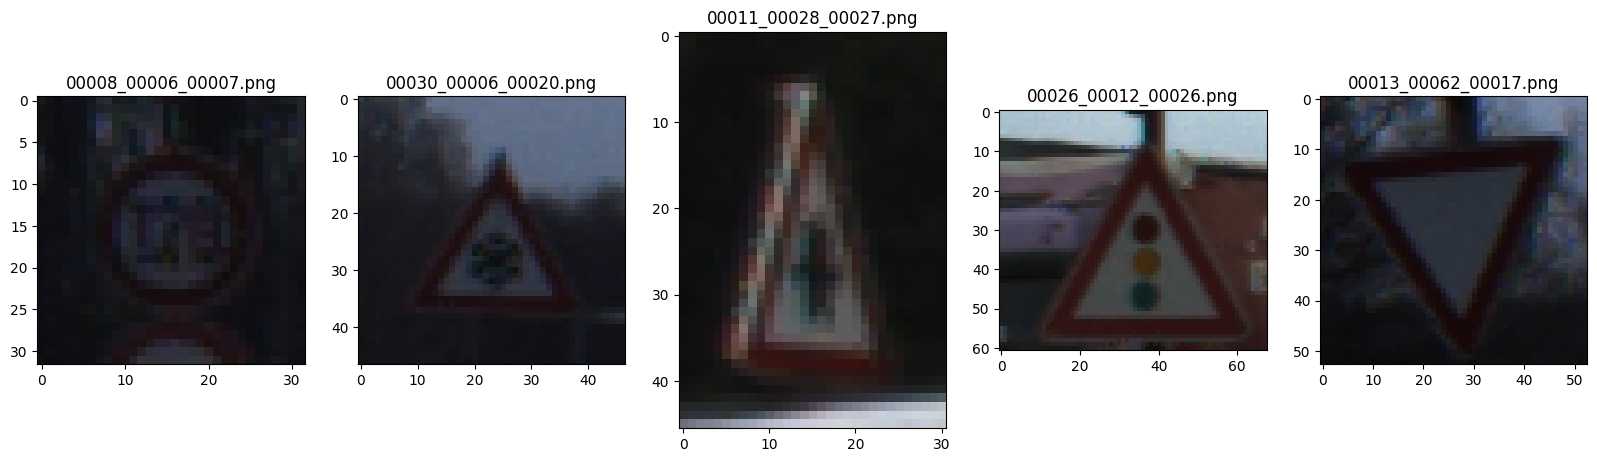

In [67]:
plt.figure(figsize=(20,20))
img_folder=r'/home/mjatheendran/code/Matuschkalulu/traffic_signs/raw_data/Train/1'
for i in range(5):
    file = random.choice(os.listdir(img_folder))
    image_path= os.path.join(img_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

## Loading Datasets

In [100]:
def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
    IMG_WIDTH=100
    IMG_HEIGHT=100
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name
# extract the image array and class name
img_data, class_name =create_dataset(r'/home/mjatheendran/code/Matuschkalulu/traffic_signs/raw_data/Train/')

In [44]:
images = tf.convert_to_tensor(img_data)

In [45]:
images.shape


TensorShape([534, 100, 100, 3])

In [71]:
#y_class = tf.convert_to_tensor(class_name)
y_class = np.array(class_name)

In [72]:
y_class

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0

## Preprocessing/Scaling/Re-sizing Images 

## Train & Test Datasets

In [101]:
from sklearn.utils import shuffle
import numpy as np

X = img_data
y = class_name
X, y = shuffle(X, y)
print(X)
print(y)

[array([[[0.7490196 , 0.69411767, 0.64705884],
        [0.74509805, 0.6901961 , 0.6431373 ],
        [0.827451  , 0.77254903, 0.7254902 ],
        ...,
        [0.89411765, 0.8627451 , 0.8117647 ],
        [0.7411765 , 0.70980394, 0.65882355],
        [0.7764706 , 0.74509805, 0.69411767]],

       [[0.77254903, 0.7176471 , 0.67058825],
        [0.7137255 , 0.65882355, 0.6117647 ],
        [0.7019608 , 0.64705884, 0.6       ],
        ...,
        [0.6745098 , 0.6431373 , 0.5921569 ],
        [0.6745098 , 0.6431373 , 0.5921569 ],
        [0.8039216 , 0.77254903, 0.72156864]],

       [[0.83137256, 0.78431374, 0.7372549 ],
        [0.8392157 , 0.7921569 , 0.74509805],
        [0.8666667 , 0.81960785, 0.77254903],
        ...,
        [0.70980394, 0.6784314 , 0.627451  ],
        [0.70980394, 0.6784314 , 0.627451  ],
        [0.73333335, 0.7019608 , 0.6509804 ]],

       ...,

       [[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 

In [127]:
np.unique(y, return_counts=True)

(array(['0', '1'], dtype='<U1'), array([233, 301]))

In [102]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, shuffle=True)

In [107]:
X_train_tf = tf.convert_to_tensor(X_train)

In [108]:
X_train_tf.shape

TensorShape([373, 100, 100, 3])

In [116]:
y_train_array = np.array(y_train).astype(int)

In [118]:
y_train_array.shape

(373,)

In [122]:
X_test_tf = tf.convert_to_tensor(X_test)

In [123]:
y_test_array = np.array(y_test).astype(int)

In [126]:
y_train_array.value_counts


AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

## Model Initialization Function

In [103]:
def initialize_model():

    model = models.Sequential()

    ### First Convolution & MaxPooling
    # YOUR CODE HERE
    model.add(layers.Conv2D(8, (3,3), activation='relu', padding='same', input_shape=(100, 100, 3)))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    ### Second Convolution & MaxPooling
    model.add(layers.Conv2D(16, (3,3), activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    ### Third Convolution & MaxPooling
    model.add(layers.Conv2D(32, (3,3), activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    ### Fourth Convolution & MaxPooling
    model.add(layers.Conv2D(32, (3,3), activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    ### Fifth Convolution & MaxPooling
    model.add(layers.Conv2D(64, (3,3), activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    ### Flattening
    # YOUR CODE HERE
    model.add(layers.Flatten())
    
    ### One Fully Connected layer - "Fully Connected" is equivalent to saying "Dense"
    # YOUR CODE HERE
    model.add(layers.Dense(10, activation='relu'))

    
    ### Last layer - Classification Layer with 10 outputs corresponding to 10 digits
    # YOUR CODE HERE
    model.add(layers.Dense(1, activation='sigmoid'))
    
    ### Model compilation
    # YOUR CODE HERE
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    return model

model=initialize_model()

## Model Compile and Train

In [119]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(patience=4 ,restore_best_weights=True)
#es = EarlyStopping()
model = initialize_model()
# Fit the model on the train data
history = model.fit(X_train_tf, y_train_array, validation_split=0.3, epochs=25, batch_size=8, callbacks=[es], verbose=1)

    

Epoch 1/25
33/33 [==============================] - 3s 67ms/step - loss: 0.6945 - accuracy: 0.5402 - val_loss: 0.6762 - val_accuracy: 0.7857
Epoch 2/25
33/33 [==============================] - 2s 58ms/step - loss: 0.5915 - accuracy: 0.7663 - val_loss: 0.6068 - val_accuracy: 0.6429
Epoch 3/25
33/33 [==============================] - 2s 59ms/step - loss: 0.4183 - accuracy: 0.8084 - val_loss: 0.6656 - val_accuracy: 0.7679
Epoch 4/25
33/33 [==============================] - 2s 60ms/step - loss: 0.4805 - accuracy: 0.8199 - val_loss: 0.3978 - val_accuracy: 0.8571
Epoch 5/25
33/33 [==============================] - 2s 58ms/step - loss: 0.3510 - accuracy: 0.8467 - val_loss: 0.3942 - val_accuracy: 0.8393
Epoch 6/25
33/33 [==============================] - 2s 58ms/step - loss: 0.2914 - accuracy: 0.8812 - val_loss: 0.3965 - val_accuracy: 0.8482
Epoch 7/25
33/33 [==============================] - 2s 62ms/step - loss: 0.2755 - accuracy: 0.8774 - val_loss: 0.4259 - val_accuracy: 0.8661
Epoch 8/25
33

## Model Summary and Parameters

In [120]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_125 (Conv2D)         (None, 100, 100, 8)       224       
                                                                 
 max_pooling2d_124 (MaxPooli  (None, 50, 50, 8)        0         
 ng2D)                                                           
                                                                 
 conv2d_126 (Conv2D)         (None, 48, 48, 16)        1168      
                                                                 
 max_pooling2d_125 (MaxPooli  (None, 24, 24, 16)       0         
 ng2D)                                                           
                                                                 
 conv2d_127 (Conv2D)         (None, 22, 22, 32)        4640      
                                                                 
 max_pooling2d_126 (MaxPooli  (None, 11, 11, 32)     

In [60]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label = 'train' + exp_name)
    ax1.plot(history.history['val_loss'], label = 'val' + exp_name)
    ax1.set_ylim(0., 2.2)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    ax2.set_ylim(0.25, 1.)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)


(<Axes: title={'center': 'loss'}>, <Axes: title={'center': 'Accuracy'}>)

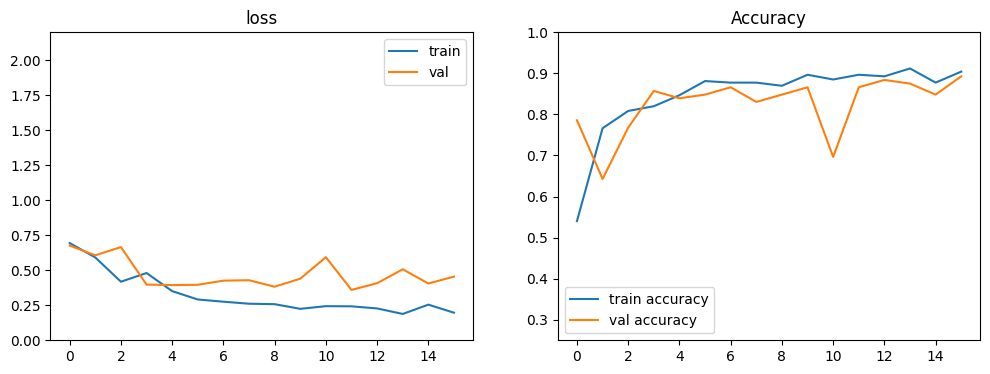

In [121]:
plot_history(history)

## Model Evaluation and Probability Prediction

In [124]:
model.evaluate(X_test_tf, y_test_array)

6/6 [==============================] - 1s 49ms/step - loss: 0.3447 - accuracy: 0.8634


[0.34467172622680664, 0.8633540272712708]